# What is the meaning of $R^2$
$R^2$ is a statistic quantity typically connected with linear regressions. It´s purpose is to measure how good a model fits to the data. Generally we can calculate the residuals of each datapoint and a predicted value, which gives us a measure of **how good we are in predicting** single datapoints. $R^2$ enters the game, if we want to know how well our model fits the data in general.

## Decomposition of the Sum of Squares
first of all some vobabulary:

- SQT (Sum of Squares Total): $SQT = \sum_{i = 1}^n(y_i - \overline y)^2$

- SQE (Sum of Squares Explained): $SQE = \sum_{i = 1}^n(\hat y_1 - y_i)^2$

- SQR (Sum of Squares Residuals): $SQR = \sum_{i = 1}^n(y_i - \hat y_i)^2$

We state that we can break down SQT into two terms SQE and SQR as follows:

$SQT = SQE + SQR$

$R^2$ now is defined as the ratio between SQE and SQT

$R^2 = \dfrac{SQE}{SQR} = \dfrac{\sum_i(\hat y_i - y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{SQR}{SQT}$

Lets have a look at how this works out with some Data

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use("ggplot")

In [148]:
def SQT(true_vals: np.ndarray) -> float:
    return np.sum(np.square(true_vals - np.mean(true_vals)))

def SQE(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return np.sum(np.square(predicted_vals - np.mean(true_vals)))

def SQR(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return np.sum(np.square(true_vals - predicted_vals))

def R_2_a(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return SQE(true_vals, predicted_vals) / SQT(true_vals)

def R_2_b(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return 1 - (SQR(true_vals, predicted_vals) / SQT(true_vals))

def RMSE(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return np.sqrt(np.sum(np.square(predicted_vals - np.mean(true_vals))))

def note(title: str, msg_list: list[str]) -> None:
    num = 100
    print("="*num)
    print(title)
    print("-"*num)
    for msg in msg_list:
        print(msg)
    print("="*num)

def evaluation(true_vals: np.ndarray, predicted_vals: np.ndarray, title: str) -> str:
    sqt = SQT(true_vals)
    sqe = SQE(true_vals, predicted_vals)
    sqr = SQR(true_vals, predicted_vals)
    rmse = RMSE(true_vals, predicted_vals)
    r2a = R_2_a(true_vals, predicted_vals)
    r2b = R_2_b(true_vals, predicted_vals)
    msg = [
        f"mean Y: {np.mean(true_vals)}",
        f"mean Y_test: {np.mean(predicted_vals)}",
        f"SQT: {sqt}",
        f"SQE: {sqe}",
        f"SQR: {sqr}",
        f"SQR / SQT: {sqr / sqt}",
        f"R2a: {r2a}",
        f"R2b: {r2b}",
        f"RMSE: {rmse}"
    ]
    note(title, msg)

def plot_decomposition(X: np.ndarray, true_vals: np.ndarray, predicted_vals: np.ndarray) -> plt.axes:

    diff_total = true_vals - np.mean(true_vals)
    diff_explained = predicted_vals - np.mean(true_vals)
    diff_residual = true_vals - predicted_vals
    y_mean = np.ones(len(X))*np.mean(true_vals)
    
    fig, ax = plt.subplots()
    ax.scatter(X, true_vals, label="true")
    ax.scatter(X, predicted_vals, label="test")
    ax.plot(X, y_mean, label="mean", ls="--", marker="", color="black")

    for i in range(len(true_vals)):
        x = X[i]
        diff_t = diff_total[i]
        diff_e = diff_explained[i]

        ls = ":"
        if np.abs(diff_e) > np.abs(diff_t):
            c = "gray"
        else:
            c = "green"

        ax.plot([x, x], [np.mean(true_vals), diff_e], ls=ls, color=c)
        ax.plot([x, x], [np.mean(true_vals) + diff_e, diff_t], ls=ls, color="red")

    ax.legend()
    fig.tight_layout()
    plt.show()

def plot_residuals(X: np.ndarray, true_vals: np.ndarray, predicted_vals: np.ndarray) -> plt.axes:

    diff_residuals = true_vals - predicted_vals
    
    mean_r = np.ones(len(X))*np.mean(diff_residuals)
    fig, ax = plt.subplots()
    ax.scatter(X, diff_residuals, color="blue", label="residuals")
    ax.plot(X, mean_r, color="black", ls="--", marker="", label="mean")
    for i in range(len(diff_residuals)):
        x = X[i]
        y = diff_residuals[i]
        ax.plot([x, x], [np.mean(diff_residuals), y], color="gray", ls=":", marker="")
    ax.legend()
    fig.tight_layout()
    plt.show()

def y_predict_linear(x, slope=0, intercept=0):
    return intercept + x*slope

Eval Random-Data
----------------------------------------------------------------------------------------------------
mean Y: 5.684341886080802e-17
mean Y_test: -8.526512829121202e-17
SQT: 24439.297401520467
SQE: 9254.389044675843
SQR: 33931.127403773135
SQR / SQT: 1.388383914901831
R2a: 0.3786683754705686
R2b: -0.3883839149018311
RMSE: 96.1997351590733


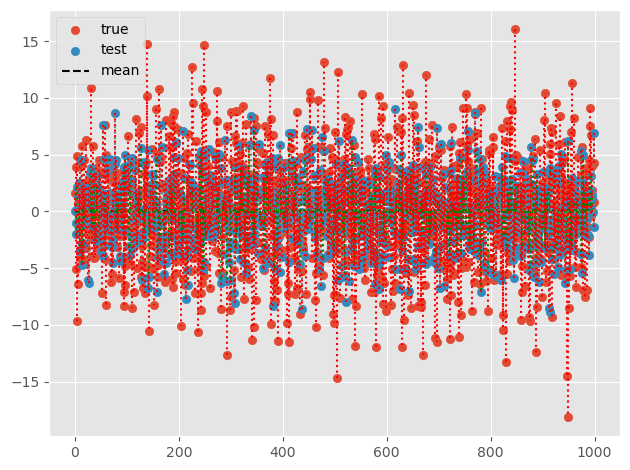

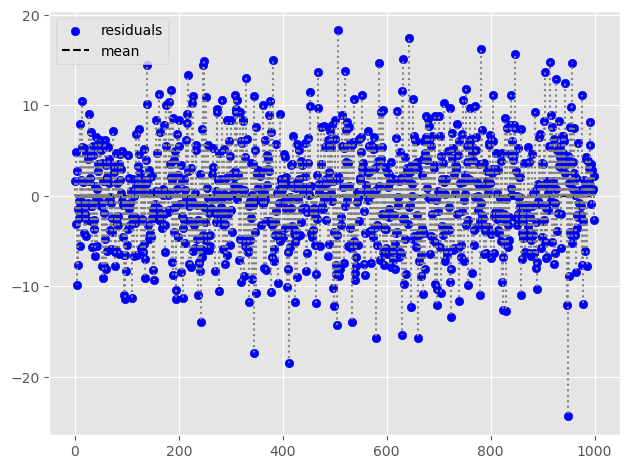

In [150]:
# setup parameter for test data
num = int(1e3)
mean = 0
variance = 5
mean_test = 0
variance_test = 3
rng = np.random.default_rng(42)
X = np.arange(0, num)
Y = rng.normal(mean, variance, num)
Y_mean = np.ones(len(X)) * mean

# setup data for test-prediction values
Y_test = rng.normal(mean_test, variance_test, num)

# center Y and Y_test around 0
Y = Y - np.mean(Y)
Y_test = Y_test - np.mean(Y_test)


# print evaluation of Y and Y_test
evaluation(Y, Y_test, "Eval Random-Data")

# plot of SQT = SQE + SQR
plot_decomposition(X, Y, Y_test)

# plot of residuals
plot_residuals(X, Y, Y_test)

Eval XGB prediction
----------------------------------------------------------------------------------------------------
mean Y: 6.286457645929457e-16
mean Y_test: -5.306000948857891e-16
SQT: 5.097522077922079
SQE: 2.4845778613926934
SQR: 2.6901684290793026
SQR / SQT: 0.5277404173943089
R2a: 0.4874089456431527
R2b: 0.4722595826056911
RMSE: 1.5762543771208672
Eval RF prediction
----------------------------------------------------------------------------------------------------
mean Y: 6.286457645929457e-16
mean Y_test: 4.890308323803048
SQT: 5.097522077922079
SQE: 23.915115501857365
SQR: 1846.561415720939
SQR / SQT: 362.2468696542967
R2a: 4.691517787718139
R2b: -361.2468696542967
RMSE: 4.890308323803047
Eval Spacy prediction
----------------------------------------------------------------------------------------------------
mean Y: 6.286457645929457e-16
mean Y_test: -7.151566496286723e-16
SQT: 5.097522077922079
SQE: 16.864512420988248
SQR: 12.956079516366131
SQR / SQT: 2.541642648784262

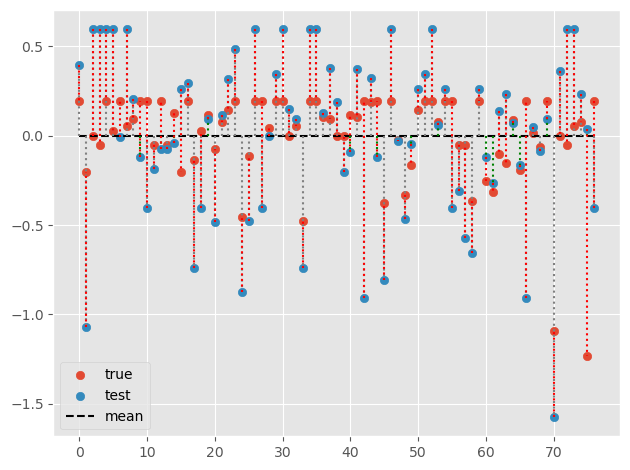

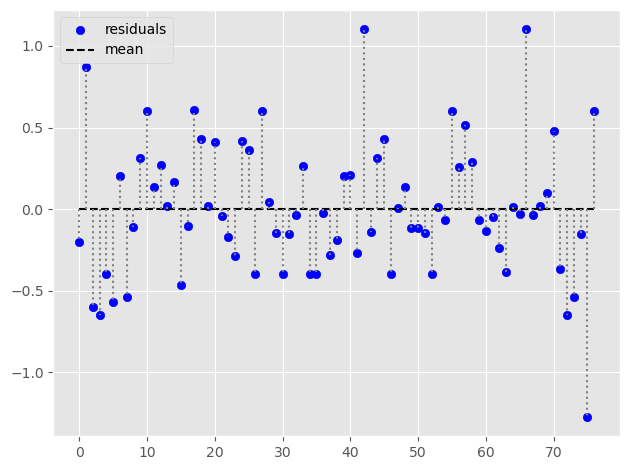

In [162]:
data = pd.read_csv(r"..\Statistics\Data\listings_Amsterdam_finished_spacy.csv")
data = data.sample(frac=0.01, axis=0)
true_vals = data.review_scores_rating.to_numpy()
prediction_xgb = data.xgb_predict_avg.to_numpy()
prediction_rf = data.rf_predict_avg.to_numpy()
prediction_spacy = data.spacy_predict_avg.to_numpy()

# center data around 0
true_vals = true_vals - np.mean(true_vals)
prediction_xgb = prediction_xgb - np.mean(prediction_xgb)
prediction_rf = prediction_rf = np.mean(prediction_rf)
prediction_spacy = prediction_spacy - np.mean(prediction_spacy)

# print evaluation of predictions
evaluation(true_vals, prediction_xgb, "Eval XGB prediction")
evaluation(true_vals, prediction_rf, "Eval RF prediction")
evaluation(true_vals, prediction_spacy, "Eval Spacy prediction")

# plot residual-decomposition
X = np.asarray(list(range(len(true_vals))))
plot_decomposition(X, true_vals, prediction_spacy)
plot_residuals(X, true_vals, prediction_spacy)